In [1]:
import pandas as pd
import numpy as np
import wrangle_zillow
import seaborn as sns

In [2]:
df_orig = wrangle_zillow.get_zillow_data()
df_orig.shape

(77381, 67)

In [3]:
df = df_orig.copy()
df = wrangle_zillow.handle_missing_values(df)
df.shape

/Users/camerontaylor/codeup-data-science/clustering_project/cameron_project/wrangle_zillow.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, thresh=threshold, inplace=True)
/Users/camerontaylor/codeup-data-science/clustering_project/cameron_project/wrangle_zillow.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, thresh=threshold, inplace=True)


(52302, 18)

FIPS:

- 6037: Los Angeles County
- 6059: Orange County
- 6111: Ventura County

In [4]:
df.fips.replace({6037:'LA County', 6059:'Orange County',
                6111:'Ventura County'}, inplace=True)

In [5]:
df = df.rename(columns={'fips':'county'})

In [6]:
df.roomcnt.replace(0, round(df.roomcnt.mean()), inplace=True)

In [7]:
df['age'] = 2017 - df.yearbuilt
df['taxrate'] = df.taxamount/df.taxvaluedollarcnt
df['land_sqft_price'] = df.landtaxvaluedollarcnt/\
    df.lotsizesquarefeet
df['house_sqft_price'] = df.structuretaxvaluedollarcnt/\
    df.calculatedfinishedsquarefeet

In [8]:
df = df.drop(columns = ['yearbuilt','taxvaluedollarcnt',
                    'landtaxvaluedollarcnt', 'taxamount',
                    'structuretaxvaluedollarcnt'])

In [9]:
# df = df[(df.taxrate < .05) & (df.bedroomcnt < 6) & 
#     (df.bathroomcnt < 6) & (df.bedroomcnt > 0) &
#     (df.bathroomcnt > 0) & (df.calculatedfinishedsquarefeet < 6000)
#        & (df.lotsizesquarefeet < 63000) ]
# df.shape

In [10]:
df.columns.tolist()

['logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'county',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'rawcensustractandblock',
 'regionidcity',
 'regionidzip',
 'roomcnt',
 'age',
 'taxrate',
 'land_sqft_price',
 'house_sqft_price']

In [11]:
df.head(1)

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,county,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidzip,roomcnt,age,taxrate,land_sqft_price,house_sqft_price
parcelid,,,,,,,,,,,,,,,,,
10711855,0.025595,3.5,4.0,3100.0,Orange County,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,96978.0,2.0,19.0,0.010763,119.30071,156.681613


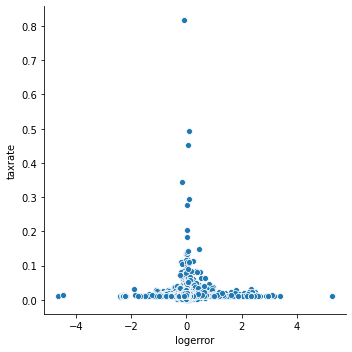

In [12]:
sns.relplot('logerror', 'taxrate', data=df)

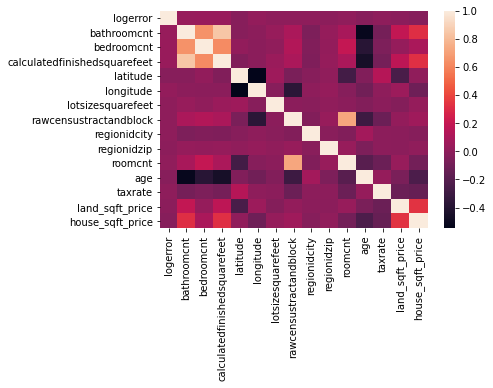

In [13]:
sns.heatmap(df.corr())

In [14]:
# sns.pairplot(df, corner=True)

In [15]:
df.shape

(52302, 17)

In [22]:
len(df.lotsizesquarefeet)

52302

In [26]:
df.apply(wrangle_zillow.drop_outliers(5))

TypeError: drop_outliers() missing 1 required positional argument: 'k'